# HR Analytics Challenge(Analytics Vidhya)


<b>The dataset has multiple attributes around Employee's past and current performance along with demographics. 
Now our task is to predict whether the potential employee in the test set will be promoted or not after the evaluation process.</b>

 

<b>Import the required libraries for data exploration and visualization</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

<b>Load the training data set</b>

In [2]:
train_hrpromotion=pd.read_csv(r'E:\Data science Projects\HR Promotion Prediction\train_hrpromotion.csv')

<b> Data exploration </b>

In [3]:
train_hrpromotion.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


<b>Data set description</b>
<table align='left' border='6'><tr><th>Variable</th><th>Definition</th></tr>
<tr>	
    <td>employee_id</td>	<td>Unique ID for employee</td></tr>
    <tr><td>department</td>	<td>Department of employee</td></tr>
    <tr><td>region</td>	<td>Region of employment (unordered)</td></tr>
    <tr><td>education</td>	<td>Education Level</td>
gender	Gender of Employee
recruitment_channel	Channel of recruitment for employee
no_of_trainings	no of other trainings completed in previous year on soft skills, technical skills etc.
age	Age of Employee
previous_year_rating	Employee Rating for the previous year
length_of_service	Length of service in years
KPIs_met >80%	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won?	if awards won during previous year then 1 else 0
avg_training_score	Average score in current training evaluations
is_promoted	(Target) Recommended for promotion

In [4]:
train_hrpromotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train_hrpromotion.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
train_hrpromotion.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [7]:
train_hrpromotion.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

<b>The previous_year_rating and education attributes has null values. We can handle this null values during data cleaning process.</b>

<b>Lets take the backup of the training set</b>

In [8]:
train_data=train_hrpromotion.copy()

In [9]:
train_data.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


<b> The target(is_promoted)column shows that count of employee who get promotion and non promotion. The employees who are not getting promotion is high in number.</b>

<h2>Data Cleaning</h2>

<b> Handling Missing values</b>

In [10]:
train_data.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [11]:
train_data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [12]:
train_data['education']=train_data['education'].fillna(train_data['education'].mode()[0])

In [13]:
train_data['previous_year_rating']=train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mode()[0])

In [14]:
train_data.isnull().sum().sort_values(ascending=False)

is_promoted             0
avg_training_score      0
awards_won?             0
KPIs_met >80%           0
length_of_service       0
previous_year_rating    0
age                     0
no_of_trainings         0
recruitment_channel     0
gender                  0
education               0
region                  0
department              0
employee_id             0
dtype: int64

In [15]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

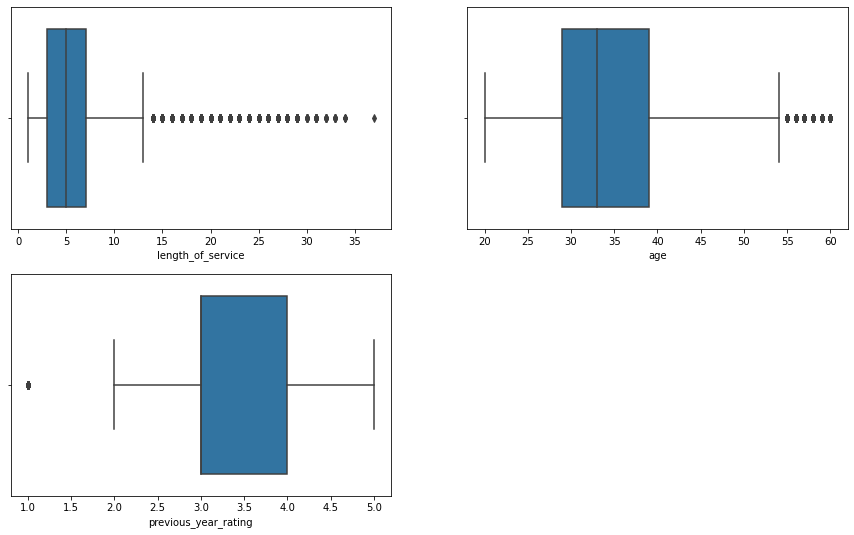

In [16]:
plt.figure(figsize=(15,9))
plt.subplot(221)
plt.title=("Length of service in years")
sns.boxplot('length_of_service', data=train_data)
plt.subplot(222)
plt.title=("Age")
sns.boxplot('age', data=train_data)
plt.subplot(223)
plt.title=("Previous year rating")
sns.boxplot('previous_year_rating', data=train_data)

plt.show()



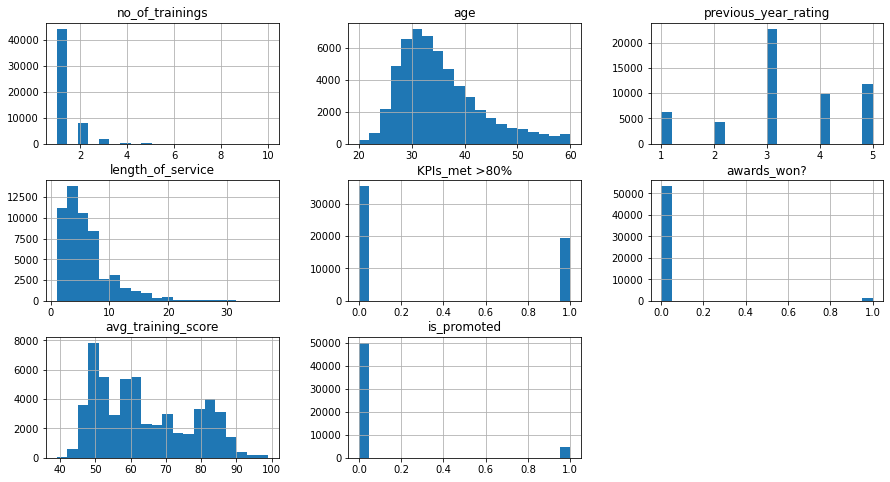

In [17]:
train_data.drop(columns='employee_id',inplace=True)
train_data.hist(bins=20, figsize=(15,8))
plt.show()

In [18]:
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,54808,3,Bachelor's,39078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808,NaN,NaN,NaN,1.25301,0.609264,1,1,1,1,10
age,54808,NaN,NaN,NaN,34.8039,7.66017,20,29,33,39,60
previous_year_rating,54808,NaN,NaN,NaN,3.30448,1.21477,1,3,3,4,5
length_of_service,54808,NaN,NaN,NaN,5.86551,4.26509,1,3,5,7,37
KPIs_met >80%,54808,NaN,NaN,NaN,0.351974,0.47759,0,0,0,1,1


<b>Lets check the Inter Quantile range</b>

Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

<h3>Data Visualization</h3>

<b>Univariate Analysis(Categorical variables)</b>

In [19]:
train_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

<b>Let us look at the distribution of target variable(is_promoted). The target variable shows the employee is promoted or not</b>

In [20]:
train_data['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

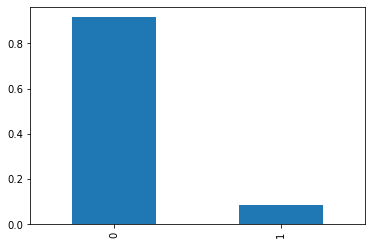

In [21]:
train_data['is_promoted'].value_counts(normalize=True).plot.bar()

<b>It shows that only 8% people are recommended for promotion </b>

<b>Lets visualize the categorical variables</b>

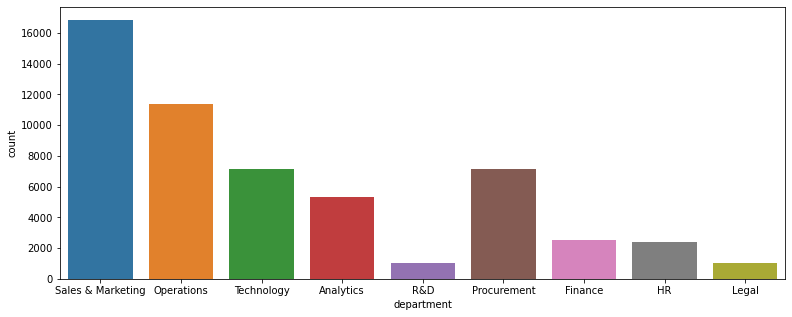

In [22]:
plt.figure(figsize=(13,5))
sns.countplot(x='department',data=train_data)
plt.show()

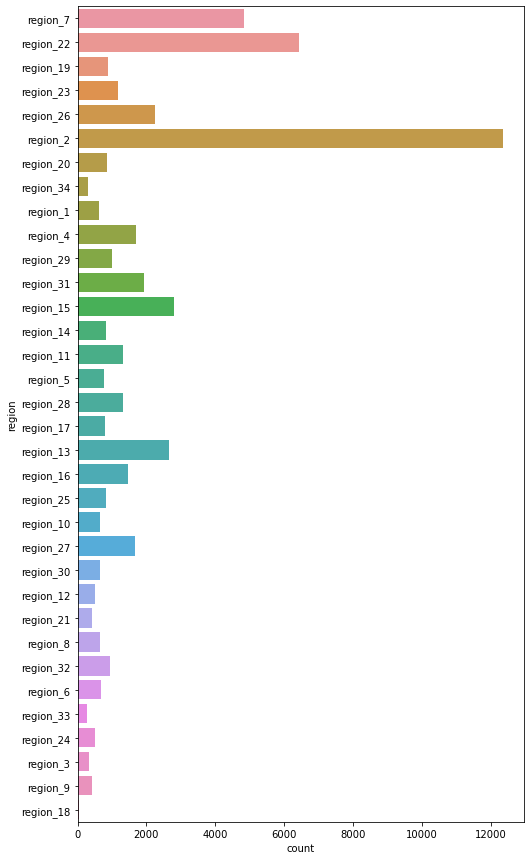

In [23]:
plt.figure(figsize=(8,15))
sns.countplot(y='region',data=train_data,orient = 'v')
plt.show()

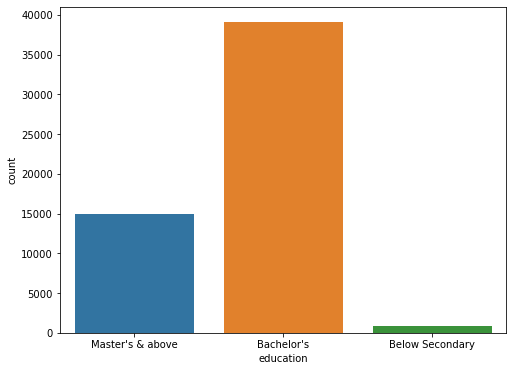

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='education',data=train_data,orient = 'v')
plt.show()

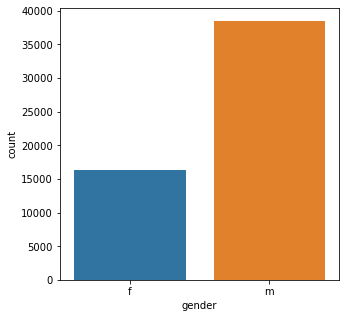

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender',data=train_data,orient = 'v')
plt.show()

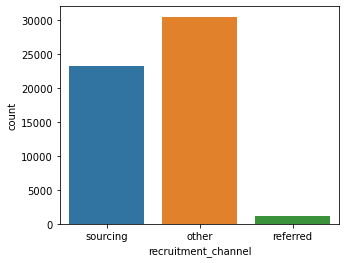

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x='recruitment_channel',data=train_data,orient = 'v')
plt.show()

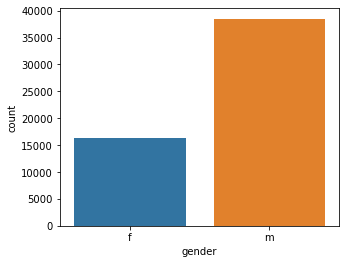

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender',data=train_data,orient = 'v')
plt.show()

<b>Lets visualize the Ordinal variables</b>

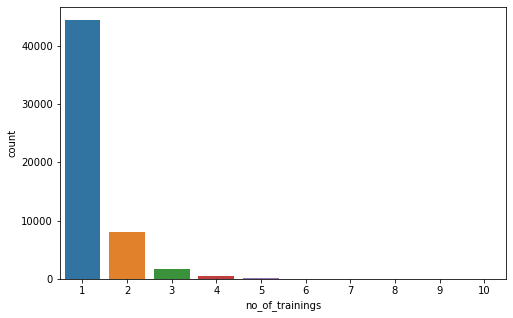

In [28]:
plt.rcParams['figure.figsize'] = [8, 5]
sns.countplot(x='no_of_trainings',data=train_data,orient = 'v')
plt.show()

In [29]:
train_data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [30]:
age_bins = [20,30,40,50,60]
age_labels = ['20-30','30-40','40-50','50-60']
train_data['age_binned'] = pd.cut(train_data['age'], bins=age_bins, labels=age_labels)
train_data['age_binned'].value_counts()

30-40    26028
20-30    18005
40-50     7810
50-60     2852
Name: age_binned, dtype: int64

In [31]:
score_bins = [30,40,50,60,70,80,90,100]
score_labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100']
train_data['score_binned'] = pd.cut(train_data['avg_training_score'], bins=score_bins, labels=score_labels)
train_data['score_binned'].value_counts()

50-60     16020
40-50     11996
60-70      9973
80-90      8739
70-80      7494
90-100      579
30-40         7
Name: score_binned, dtype: int64

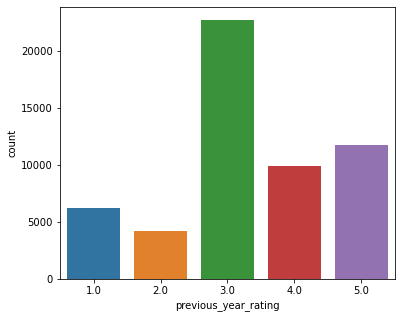

In [32]:
plt.rcParams['figure.figsize'] = [6, 5]
sns.countplot(x='previous_year_rating',data=train_data,orient = 'v')
plt.show()

In [33]:
service_bins = [1,5,10,15,20,25,30,35,40]
service_labels = ['1-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']
train_data['service_binned'] = pd.cut(train_data['length_of_service'], bins=service_bins, labels=service_labels)
train_data['service_binned'].value_counts()

1-5      26385
5-10     17990
10-15     3539
15-20     1829
20-25      325
25-30      149
30-35       43
35-40        1
Name: service_binned, dtype: int64

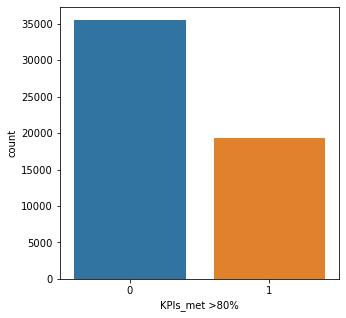

In [34]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.countplot(x='KPIs_met >80%',data=train_data,orient = 'v')
plt.show()

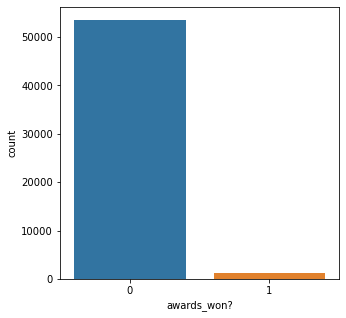

In [35]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.countplot(x='awards_won?',data=train_data,orient = 'v')
plt.show()

<b>Lets see the Bivariate analysis</b>

In [36]:
train_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'age_binned', 'score_binned', 'service_binned'],
      dtype='object')

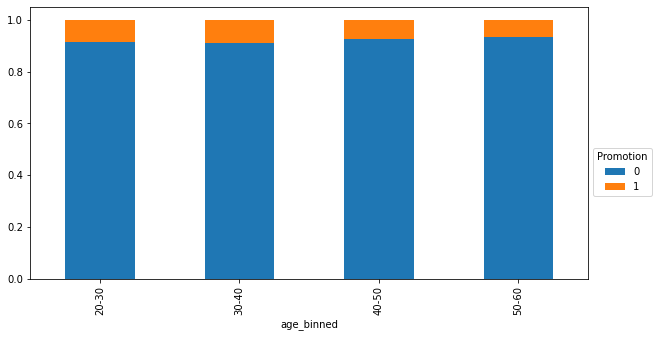

In [37]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['age_binned'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

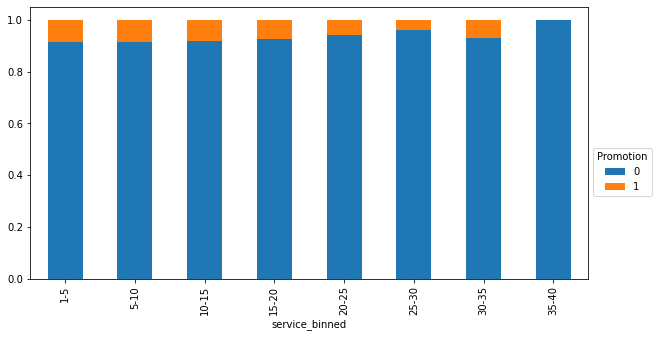

In [38]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['service_binned'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

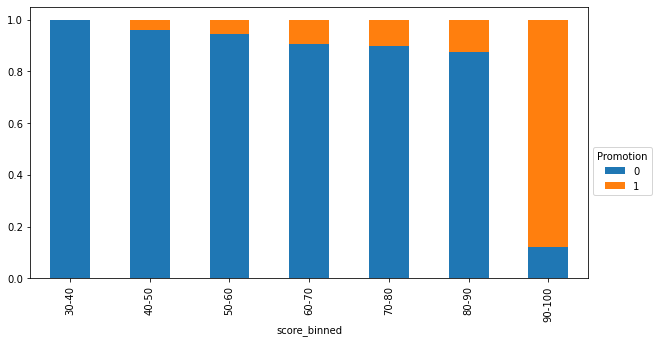

In [39]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['score_binned'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

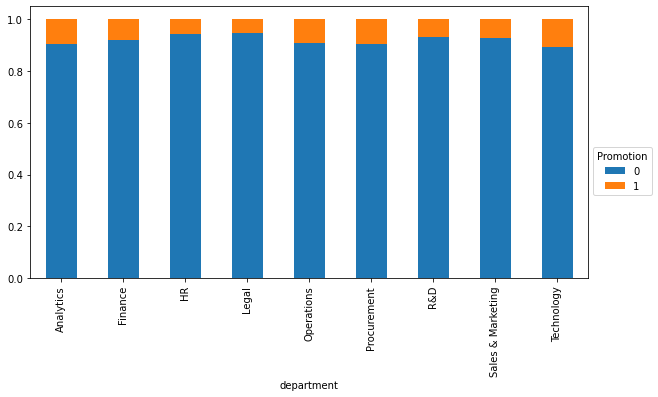

In [40]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['department'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

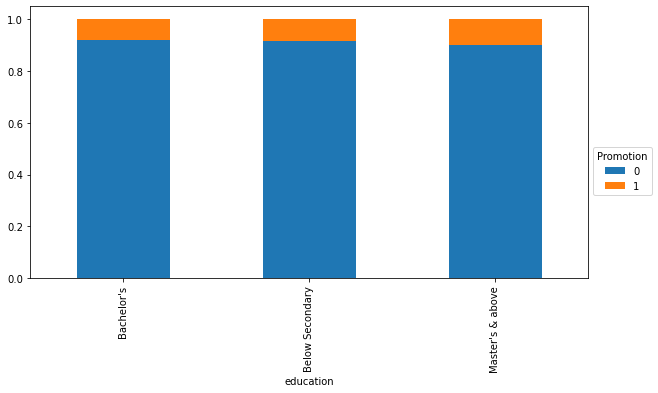

In [41]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['education'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

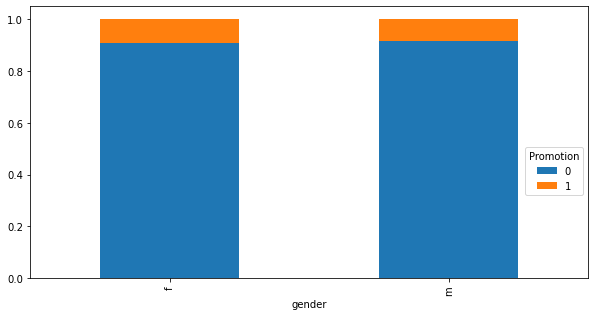

In [42]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['gender'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

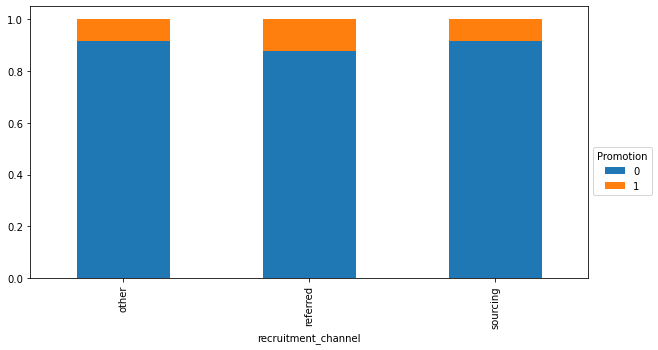

In [43]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['recruitment_channel'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

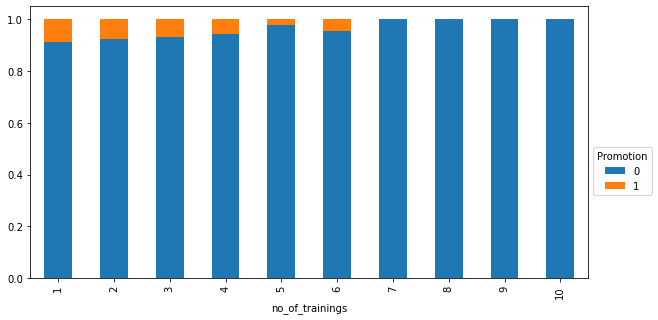

In [44]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['no_of_trainings'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

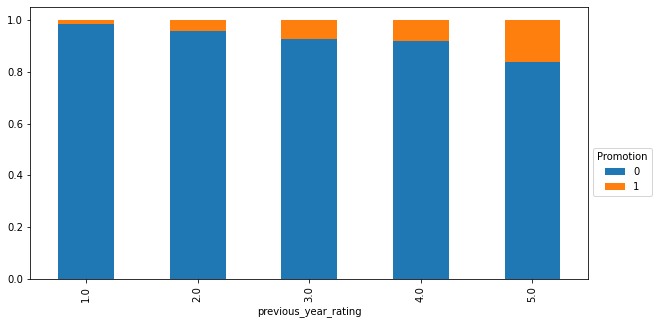

In [45]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['previous_year_rating'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

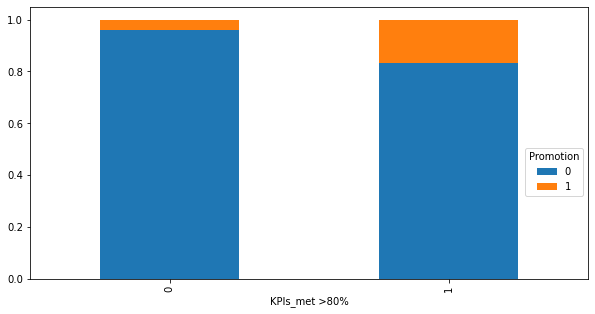

In [46]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['KPIs_met >80%'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

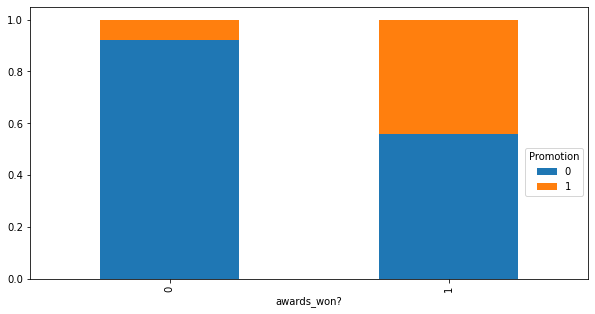

In [47]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data['awards_won?'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))

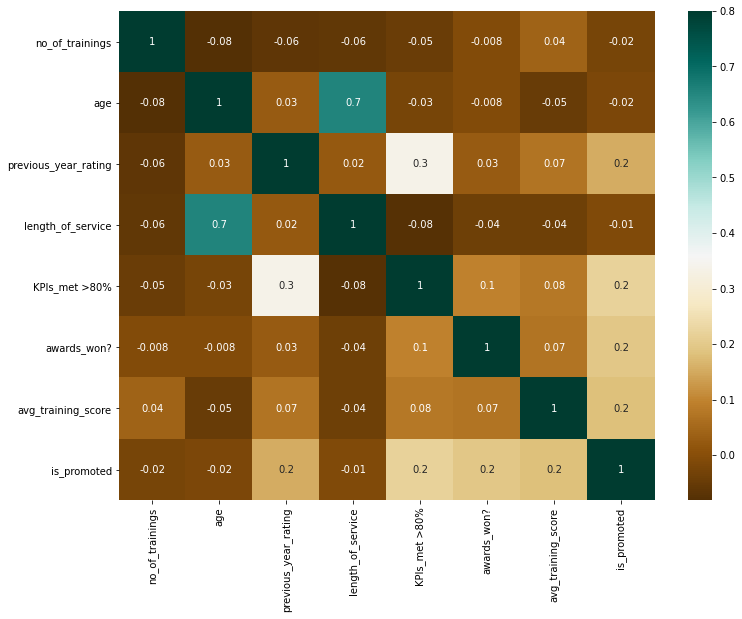

In [48]:
plt.figure(figsize=(12, 9))
sns.heatmap(train_data.corr(),vmax='.8',annot = True,fmt='.1g',cmap='BrBG')

<b>From the above heatmap we can see that Age and Length of service is highly correlated with the target variable for promotion</b>

<Figure size 720x360 with 0 Axes>

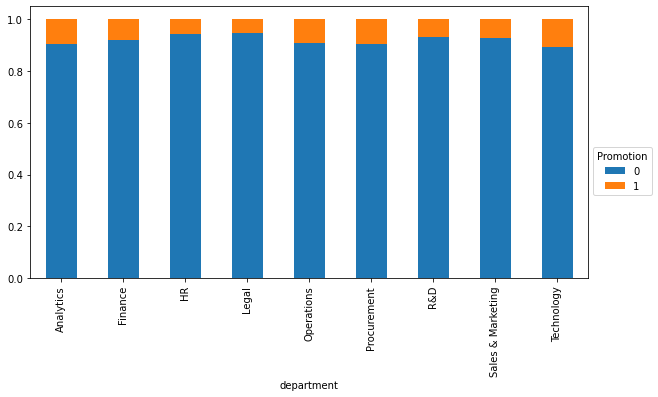

In [49]:
plt.figure(figsize=(10,5))
ct = pd.crosstab(train_data['department'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promotion',bbox_to_anchor=(1,0.5))


<Figure size 720x360 with 0 Axes>

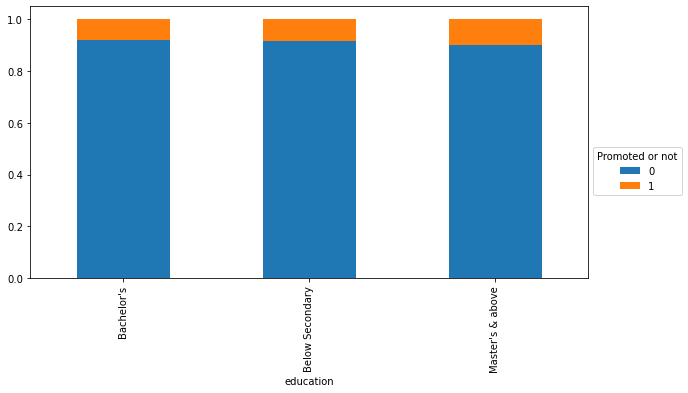

In [50]:
plt.figure(figsize=(10,5))
ct = pd.crosstab(train_data['education'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promoted or not',bbox_to_anchor=(1,0.5))

<Figure size 720x360 with 0 Axes>

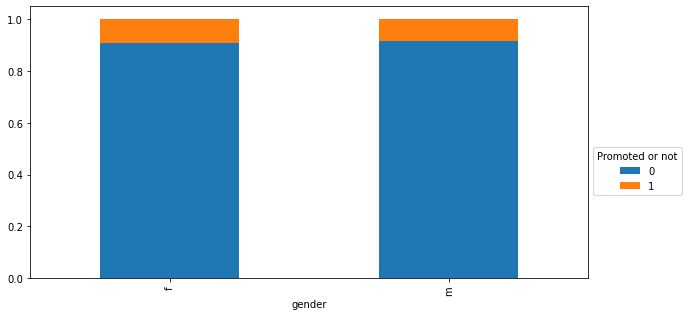

In [51]:
plt.figure(figsize=(10,5))
ct = pd.crosstab(train_data['gender'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promoted or not',bbox_to_anchor=(1,0.5))

<Figure size 720x360 with 0 Axes>

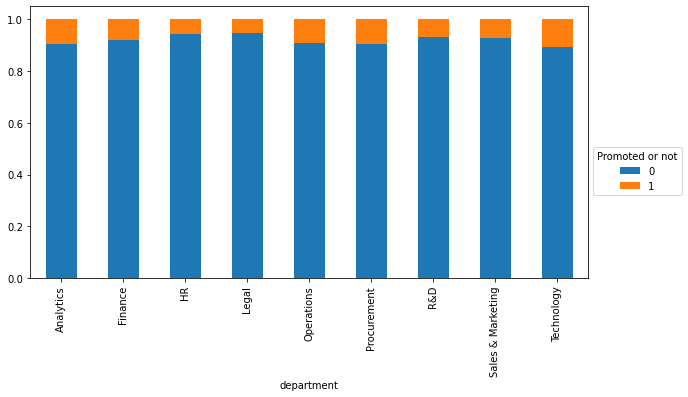

In [52]:
plt.figure(figsize=(10,5))
ct = pd.crosstab(train_data['department'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promoted or not',bbox_to_anchor=(1,0.5))

<Figure size 720x360 with 0 Axes>

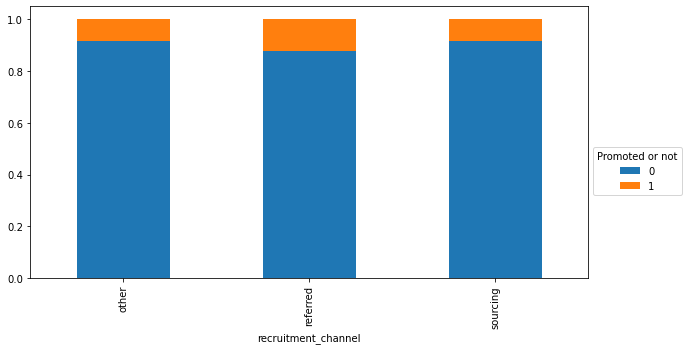

In [53]:
plt.figure(figsize=(10,5))
ct = pd.crosstab(train_data['recruitment_channel'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promoted or not',bbox_to_anchor=(1,0.5))

<Figure size 720x360 with 0 Axes>

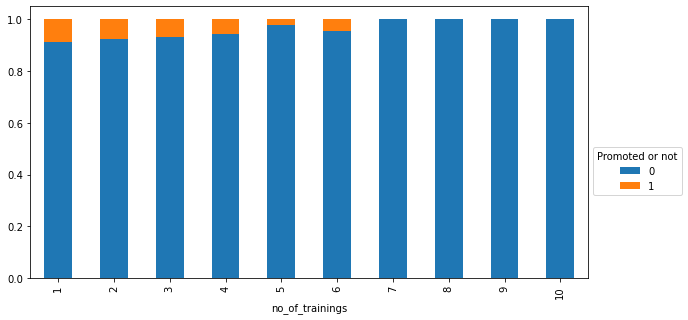

In [54]:
plt.figure(figsize=(10,5))
ct = pd.crosstab(train_data['no_of_trainings'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promoted or not',bbox_to_anchor=(1,0.5))

<Figure size 1800x360 with 0 Axes>

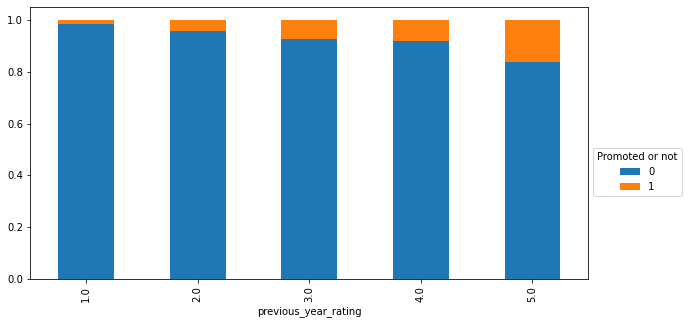

In [55]:
plt.figure(figsize=(25,5))
ct = pd.crosstab(train_data['previous_year_rating'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promoted or not',bbox_to_anchor=(1,0.5))

<Figure size 1800x360 with 0 Axes>

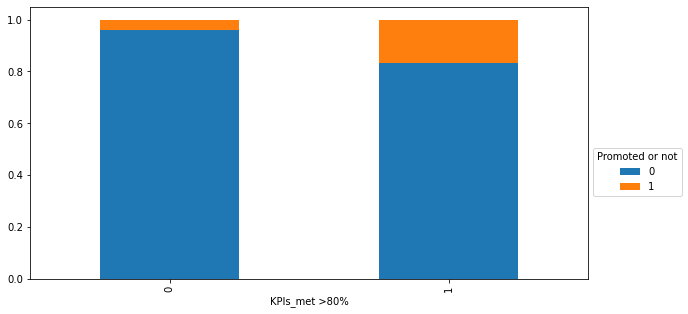

In [56]:
plt.figure(figsize=(25,5))
ct = pd.crosstab(train_data['KPIs_met >80%'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promoted or not',bbox_to_anchor=(1,0.5))

In [57]:
train_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'age_binned', 'score_binned', 'service_binned'],
      dtype='object')

<Figure size 1800x360 with 0 Axes>

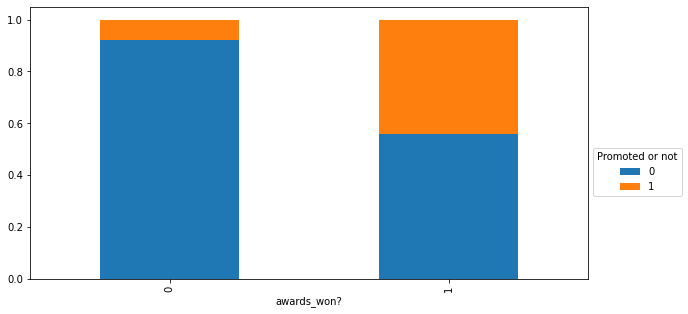

In [58]:
plt.figure(figsize=(25,5))
ct = pd.crosstab(train_data['awards_won?'],train_data['is_promoted'],normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='Promoted or not',bbox_to_anchor=(1,0.5))

In [59]:
train_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'age_binned', 'score_binned', 'service_binned'],
      dtype='object')

In [60]:
le=LabelEncoder()

In [61]:
train_data['department']=le.fit_transform(train_data['department'])
train_data['region']=le.fit_transform(train_data['region'])
train_data['education']=le.fit_transform(train_data['education'])
train_data['gender']=le.fit_transform(train_data['gender'])
train_data['recruitment_channel']=le.fit_transform(train_data['recruitment_channel'])



In [62]:
ss=StandardScaler()

In [63]:
train_data['no_of_trainings']=ss.fit_transform(train_data.no_of_trainings.values.reshape(-1,1))

In [64]:
train_data['age']=ss.fit_transform(train_data.age.values.reshape(-1,1))

In [65]:
train_data['previous_year_rating']=ss.fit_transform(train_data.previous_year_rating.values.reshape(-1,1))

In [66]:
train_data['length_of_service']=ss.fit_transform(train_data.length_of_service.values.reshape(-1,1))

In [67]:
train_data['KPIs_met >80%']=ss.fit_transform(train_data['KPIs_met >80%'].values.reshape(-1,1))

In [68]:
train_data['awards_won?']=ss.fit_transform(train_data['awards_won?'].values.reshape(-1,1))

In [69]:
train_data['avg_training_score']=ss.fit_transform(train_data['avg_training_score'].values.reshape(-1,1))

In [70]:
train_data.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_binned,score_binned,service_binned
0,7,31,2,0,2,-0.415276,0.025598,1.395766,0.500460,1.356878,-0.154018,-1.075931,0,30-40,40-50,5-10
1,4,14,0,1,0,-0.415276,-0.627135,1.395766,-0.437395,-0.736986,-0.154018,-0.253282,0,20-30,50-60,1-5
2,7,10,0,1,2,-0.415276,-0.104948,-0.250651,0.265996,-0.736986,-0.154018,-1.001145,0,30-40,40-50,5-10
3,7,15,0,1,0,1.226063,0.547785,-1.897069,0.969387,-0.736986,-0.154018,-1.001145,0,30-40,40-50,5-10
4,8,18,0,1,0,-0.415276,1.331064,-0.250651,-0.906322,-0.736986,-0.154018,0.718939,0,40-50,70-80,1-5
5,0,11,0,1,2,1.226063,-0.496588,-0.250651,0.265996,-0.736986,-0.154018,1.616374,0,30-40,80-90,5-10
6,4,12,0,0,0,-0.415276,-0.496588,-0.250651,-0.202931,-0.736986,-0.154018,-0.328069,0,30-40,50-60,1-5
7,4,27,2,1,2,-0.415276,-0.235495,-0.250651,0.031532,-0.736986,-0.154018,-0.028924,0,30-40,60-70,5-10
8,0,12,0,1,0,-0.415276,-0.888228,0.572557,-0.202931,-0.736986,-0.154018,1.466802,0,20-30,80-90,1-5
9,7,0,2,1,2,-0.415276,-0.366042,1.395766,-0.202931,1.356878,-0.154018,-0.702000,0,30-40,50-60,1-5


In [71]:
train_data.dtypes

department                 int32
region                     int32
education                  int32
gender                     int32
recruitment_channel        int32
no_of_trainings          float64
age                      float64
previous_year_rating     float64
length_of_service        float64
KPIs_met >80%            float64
awards_won?              float64
avg_training_score       float64
is_promoted                int64
age_binned              category
score_binned            category
service_binned          category
dtype: object

In [72]:
train_data.drop(['age_binned','score_binned','service_binned'],axis=1,inplace=True)


In [73]:
train_data.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,-0.415276,0.025598,1.395766,0.500460,1.356878,-0.154018,-1.075931,0
1,4,14,0,1,0,-0.415276,-0.627135,1.395766,-0.437395,-0.736986,-0.154018,-0.253282,0
2,7,10,0,1,2,-0.415276,-0.104948,-0.250651,0.265996,-0.736986,-0.154018,-1.001145,0
3,7,15,0,1,0,1.226063,0.547785,-1.897069,0.969387,-0.736986,-0.154018,-1.001145,0
4,8,18,0,1,0,-0.415276,1.331064,-0.250651,-0.906322,-0.736986,-0.154018,0.718939,0
5,0,11,0,1,2,1.226063,-0.496588,-0.250651,0.265996,-0.736986,-0.154018,1.616374,0
6,4,12,0,0,0,-0.415276,-0.496588,-0.250651,-0.202931,-0.736986,-0.154018,-0.328069,0
7,4,27,2,1,2,-0.415276,-0.235495,-0.250651,0.031532,-0.736986,-0.154018,-0.028924,0
8,0,12,0,1,0,-0.415276,-0.888228,0.572557,-0.202931,-0.736986,-0.154018,1.466802,0
9,7,0,2,1,2,-0.415276,-0.366042,1.395766,-0.202931,1.356878,-0.154018,-0.702000,0


In [74]:
train_data.shape

(54808, 13)

In [75]:
X=train_data.drop(['is_promoted'],axis=1)

In [76]:
y=train_data['is_promoted']

In [77]:
X.shape,y.shape

((54808, 12), (54808,))

In [78]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
X=X_smote
y=y_smote

In [79]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


<h2>Logistic Regression</h2>

In [81]:
lrmodel = LogisticRegression(max_iter=5000)
lrmodel.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [82]:
lpredictions = lrmodel.predict(X_test)

In [83]:
print("Confusion Matrix")
print(confusion_matrix(y_test,lpredictions))

print("Classification report")

print(classification_report(y_test, lpredictions)) 

Confusion Matrix
[[7294 2719]
 [2617 7426]]
Classification report
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     10013
           1       0.73      0.74      0.74     10043

    accuracy                           0.73     20056
   macro avg       0.73      0.73      0.73     20056
weighted avg       0.73      0.73      0.73     20056



In [84]:
print(f1_score(y_test, lpredictions)) 

0.7356845650881713


In [85]:
lscore = round((lrmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",lscore,"%")


Model Score: 73.39 %


<h2>K-Nearest Neighbors</h2>

In [86]:
kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [87]:
kpredictions = kmodel.predict(X_test)

In [88]:
print("Confusion Matrix")
print(confusion_matrix(y_test,kpredictions))

print("Classification report")

print(classification_report(y_test, kpredictions)) 

kscore = round((kmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",kscore,"%")

Confusion Matrix
[[8405 1608]
 [ 229 9814]]
Classification report
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     10013
           1       0.86      0.98      0.91     10043

    accuracy                           0.91     20056
   macro avg       0.92      0.91      0.91     20056
weighted avg       0.92      0.91      0.91     20056


Model Score: 90.84 %


<h2>Decision Tree Classifier</h2>

In [89]:
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
dprediction = dmodel.predict(X_test)

In [91]:
print("Confusion Matrix")
print(confusion_matrix(y_test,dprediction))

print(classification_report(y_test, dprediction)) 

dtscore = round((dmodel.score(X_train, y_train)*100),2)
dscore = round((dmodel.score(X_test, y_test)*100),2)
print ("\nModel test Score:",dscore,"%")
print ("\nModel train Score:",dtscore,"%")

Confusion Matrix
[[9306  707]
 [ 559 9484]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10013
           1       0.93      0.94      0.94     10043

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056


Model test Score: 93.69 %

Model train Score: 99.99 %


<h2>Random Forest Classifier</h2>

In [92]:
rmodel = RandomForestClassifier(n_estimators=100)
rmodel.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
rprediction = rmodel.predict(X_test)

In [94]:
print("Confusion Matrix")
print(confusion_matrix(y_test,rprediction))

print(classification_report(y_test, rprediction)) 

rscore = round((rmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",rscore,"%")

Confusion Matrix
[[9675  338]
 [ 390 9653]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     10013
           1       0.97      0.96      0.96     10043

    accuracy                           0.96     20056
   macro avg       0.96      0.96      0.96     20056
weighted avg       0.96      0.96      0.96     20056


Model Score: 96.37 %


<h2>Ada boost Classification</h2>

In [95]:
# Ada boost Classification
adb=AdaBoostClassifier()
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [96]:
adbprediction=adb.predict(X_test)


In [97]:
print("Confusion Matrix")
print(confusion_matrix(y_test,adbprediction))

print(classification_report(y_test, adbprediction)) 

adbscore = round((rmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",adbscore,"%")

Confusion Matrix
[[8368 1645]
 [1727 8316]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     10013
           1       0.83      0.83      0.83     10043

    accuracy                           0.83     20056
   macro avg       0.83      0.83      0.83     20056
weighted avg       0.83      0.83      0.83     20056


Model Score: 96.37 %


<h2>Stochastic Gradient Descent</h2>

In [98]:
sgdmodel = SGDClassifier()
sgdmodel.fit(X_train,y_train)
sgdprediction = sgdmodel.predict(X_test)

In [99]:
print("Confusion Matrix")
print(confusion_matrix(y_test,sgdprediction))

print(classification_report(y_test, sgdprediction)) 

sgdscore = round((rmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",sgdscore,"%")

Confusion Matrix
[[7080 2933]
 [2138 7905]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     10013
           1       0.73      0.79      0.76     10043

    accuracy                           0.75     20056
   macro avg       0.75      0.75      0.75     20056
weighted avg       0.75      0.75      0.75     20056


Model Score: 96.37 %


<h2>Gaussian Naive Bayes</h2>

In [100]:
gaussianmodel = GaussianNB()
gaussianmodel.fit(X_train,y_train)
guassianprediction = gaussianmodel.predict(X_test)

In [101]:
print("Confusion Matrix")
print(confusion_matrix(y_test,guassianprediction))

print(classification_report(y_test, guassianprediction)) 

gaussianscore = round((rmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",gaussianscore,"%")

Confusion Matrix
[[8170 1843]
 [4238 5805]]
              precision    recall  f1-score   support

           0       0.66      0.82      0.73     10013
           1       0.76      0.58      0.66     10043

    accuracy                           0.70     20056
   macro avg       0.71      0.70      0.69     20056
weighted avg       0.71      0.70      0.69     20056


Model Score: 96.37 %


In [102]:
data = [['Logistic Regression',lscore],['K-Nearest Neighbour',kscore],
        ['Decision Tree',dscore],['Random Forest',rscore],['Ada Boost Classification',adbscore],['Stochastic Gradient Descent',sgdscore],['Gaussian Naive Bayes',gaussianscore]]
final = pd.DataFrame(data,columns=['Algorithm','Score'],index=[1,2,3,4,5,6,7])

In [103]:
print("The results of Data Modeling are as follows:\n ")
print(final)

The results of Data Modeling are as follows:
 
                     Algorithm  Score
1          Logistic Regression  73.39
2          K-Nearest Neighbour  90.84
3                Decision Tree  93.69
4                Random Forest  96.37
5     Ada Boost Classification  96.37
6  Stochastic Gradient Descent  96.37
7         Gaussian Naive Bayes  96.37


<h1> Lets explore the test data set</h1>

In [132]:
test_hrpromotion=pd.read_csv(r'E:\Data science Projects\HR Promotion Prediction\test_hrpromotion.csv')

In [133]:
test_hrpromotion.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [134]:
test_hrpromotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [135]:
test_hrpromotion.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,23490.0,39041.399149,22640.809201,3.0,19370.25,38963.5,58690.0,78295.0
no_of_trainings,23490.0,1.254236,0.600910,1.0,1.00,1.0,1.0,9.0
age,23490.0,34.782929,7.679492,20.0,29.00,33.0,39.0,60.0
previous_year_rating,21678.0,3.339146,1.263294,1.0,3.00,3.0,4.0,5.0
length_of_service,23490.0,5.810387,4.207917,1.0,3.00,5.0,7.0,34.0
KPIs_met >80%,23490.0,0.358834,0.479668,0.0,0.00,0.0,1.0,1.0
awards_won?,23490.0,0.022776,0.149191,0.0,0.00,0.0,0.0,1.0
avg_training_score,23490.0,63.263133,13.411750,39.0,51.00,60.0,76.0,99.0


In [136]:
test_data=test_hrpromotion.copy()

In [137]:
test_data.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [138]:
train_data.dtypes

department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings         float64
age                     float64
previous_year_rating    float64
length_of_service       float64
KPIs_met >80%           float64
awards_won?             float64
avg_training_score      float64
is_promoted               int64
dtype: object

In [139]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int32  
 1   region                54808 non-null  int32  
 2   education             54808 non-null  int32  
 3   gender                54808 non-null  int32  
 4   recruitment_channel   54808 non-null  int32  
 5   no_of_trainings       54808 non-null  float64
 6   age                   54808 non-null  float64
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  float64
 9   KPIs_met >80%         54808 non-null  float64
 10  awards_won?           54808 non-null  float64
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(7), int32(5), int64(1)
memory usage: 4.4 MB


In [140]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
department,54808.0,4.972796e+00,2.506046,0.000000,4.000000,5.000000,7.000000,8.000000
region,54808.0,1.542897e+01,8.764954,0.000000,11.000000,14.000000,21.000000,33.000000
education,54808.0,5.593162e-01,0.889452,0.000000,0.000000,0.000000,2.000000,2.000000
gender,54808.0,7.023792e-01,0.457216,0.000000,0.000000,1.000000,1.000000,1.000000
recruitment_channel,54808.0,8.681579e-01,0.980713,0.000000,0.000000,0.000000,2.000000,2.000000
no_of_trainings,54808.0,-4.077590e-16,1.000009,-0.415276,-0.415276,-0.415276,-0.415276,14.356780
age,54808.0,-4.775247e-16,1.000009,-1.932601,-0.757681,-0.235495,0.547785,3.289263
previous_year_rating,54808.0,-2.250750e-16,1.000009,-1.897069,-0.250651,-0.250651,0.572557,1.395766
length_of_service,54808.0,1.505713e-16,1.000009,-1.140785,-0.671858,-0.202931,0.265996,7.299903
KPIs_met >80%,54808.0,1.447678e-15,1.000009,-0.736986,-0.736986,-0.736986,1.356878,1.356878


In [141]:
test_data.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [142]:
test_data['education'].value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [143]:
test_data['education']=test_data['education'].fillna(test_data['education'].mode()[0])

In [144]:
test_data['previous_year_rating'].value_counts()

3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64

In [145]:
test_data['previous_year_rating']=test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].mode()[0])

In [146]:
test_data.isnull().sum().sort_values(ascending=False)

avg_training_score      0
awards_won?             0
KPIs_met >80%           0
length_of_service       0
previous_year_rating    0
age                     0
no_of_trainings         0
recruitment_channel     0
gender                  0
education               0
region                  0
department              0
employee_id             0
dtype: int64

In [147]:
test_data['department']=le.fit_transform(test_data['department'])
test_data['region']=le.fit_transform(test_data['region'])
test_data['education']=le.fit_transform(test_data['education'])
test_data['gender']=le.fit_transform(test_data['gender'])
test_data['recruitment_channel']=le.fit_transform(test_data['recruitment_channel'])

In [148]:
test_data['no_of_trainings']=ss.fit_transform(test_data.no_of_trainings.values.reshape(-1,1))
test_data['age']=ss.fit_transform(test_data.age.values.reshape(-1,1))
test_data['previous_year_rating']=ss.fit_transform(test_data.previous_year_rating.values.reshape(-1,1))
test_data['length_of_service']=ss.fit_transform(test_data.length_of_service.values.reshape(-1,1))
test_data['KPIs_met >80%']=ss.fit_transform(test_data['KPIs_met >80%'].values.reshape(-1,1))
test_data['awards_won?']=ss.fit_transform(test_data['awards_won?'].values.reshape(-1,1))
test_data['avg_training_score']=ss.fit_transform(test_data['avg_training_score'].values.reshape(-1,1))

In [149]:
test_data.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,-0.423094,-1.404150,-0.257191,-1.143200,1.336715,-0.152665,1.024263
1,74430,2,28,0,0,0,-0.423094,-0.492612,-0.257191,-0.192590,-0.748103,-0.152665,-0.914377
2,72255,7,4,0,1,0,-0.423094,-0.492612,-1.900667,-0.430243,-0.748103,-0.152665,-1.212629
3,38562,5,11,0,0,0,2.905264,-0.492612,-1.078929,0.758019,-0.748103,-0.152665,0.129506
4,64486,1,21,0,1,2,-0.423094,-0.622832,0.564547,0.282714,-0.748103,-0.152665,-0.168746
5,46232,5,31,0,1,2,-0.423094,0.158487,-0.257191,-0.905548,-0.748103,-0.152665,0.353195
6,54542,1,11,0,1,0,-0.423094,-0.232173,1.386285,-0.667895,1.336715,-0.152665,-0.466998
7,67269,0,14,0,1,2,1.241085,0.158487,-0.257191,-0.667895,-0.748103,-0.152665,1.620768
8,66174,8,31,2,1,0,-0.423094,2.111783,0.564547,1.233324,-0.748103,-0.152665,0.875137
9,76303,8,14,0,1,2,-0.423094,-0.753051,1.386285,-0.905548,1.336715,-0.152665,0.949700


In [150]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  int32  
 2   region                23490 non-null  int32  
 3   education             23490 non-null  int32  
 4   gender                23490 non-null  int32  
 5   recruitment_channel   23490 non-null  int32  
 6   no_of_trainings       23490 non-null  float64
 7   age                   23490 non-null  float64
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  float64
 10  KPIs_met >80%         23490 non-null  float64
 11  awards_won?           23490 non-null  float64
 12  avg_training_score    23490 non-null  float64
dtypes: float64(7), int32(5), int64(1)
memory usage: 1.9 MB


In [151]:
test_data.drop(['employee_id'],axis=1,inplace=True)


<h2>Logistic Regression</h2>

In [152]:
lrtestmodel = LogisticRegression(max_iter=5000)
lrtestmodel.fit(X,y)

LogisticRegression(max_iter=5000)

In [153]:
X.shape,y.shape

((100280, 12), (100280,))

In [154]:
X_sampletest=test_data.copy()

In [155]:
X_sampletest.shape

(23490, 12)

In [156]:
testlr_prediction=lrtestmodel.predict(X_sampletest)
testlrscore = round((lrtestmodel.score(X, y)*100),2)
print ("\nAccuracy:",testlrscore,"%")




Accuracy: 73.18 %


In [184]:
logfinal=pd.concat([test_hrpromotion['employee_id'],pd.DataFrame(testlr_prediction,columns=['is_promoted'])],1)
logfinal.to_csv(r"E:\Data science Projects\HR Promotion Prediction\logfinal.csv",index=False)

<h2>K-Nearest Neighbors</h2>

In [161]:
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [162]:
testknn_prediction=knnmodel.predict(X_sampletest)


In [163]:
knnscore = round((kmodel.score(X, y)*100),2)
print ("\nAccuracy:",knnscore,"%")


Accuracy: 95.58 %


In [185]:
knnfinal=pd.concat([test_hrpromotion['employee_id'],pd.DataFrame(testknn_prediction,columns=['is_promoted'])],1)
knnfinal.to_csv(r"E:\Data science Projects\HR Promotion Prediction\knnfinal.csv",index=False)

<h2>Decision Tree Classifier</h2>

In [164]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X,y)

DecisionTreeClassifier()

In [165]:
dtprediction = dtmodel.predict(X_sampletest)

In [166]:
dtreescore = round((dtmodel.score(X, y)*100),2)
print ("\nAccuracy:",dtreescore,"%")


Accuracy: 99.99 %


In [186]:
dtfinal=pd.concat([test_hrpromotion['employee_id'],pd.DataFrame(dtprediction,columns=['is_promoted'])],1)
dtfinal.to_csv(r"E:\Data science Projects\HR Promotion Prediction\dtfinal.csv",index=False)

<h2>Random Forest Classifier</h2>

In [180]:
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(X,y)

RandomForestClassifier()

In [181]:
rfprediction = rfmodel.predict(X_sampletest)

In [182]:
rfscore = round((rfmodel.score(X, y)*100),2)
print ("\nAccuracy:",rfscore,"%")


Accuracy: 99.99 %


In [183]:
randomfinal=pd.concat([test_hrpromotion['employee_id'],pd.DataFrame(rfprediction,columns=['is_promoted'])],1)
randomfinal.to_csv(r"E:\Data science Projects\HR Promotion Prediction\randomfinal.csv",index=False)

<h2>Ada Boost Classifier</h2>

In [170]:
adbclass=AdaBoostClassifier()
adbclass.fit(X,y)

AdaBoostClassifier()

In [171]:
adbclassprediction = adbclass.predict(X_sampletest)

In [172]:
adbclassscore = round((adbclass.score(X, y)*100),2)
print ("\nAccuracy:",adbclassscore,"%")


Accuracy: 83.79 %


In [187]:
adafinal=pd.concat([test_hrpromotion['employee_id'],pd.DataFrame(adbclassprediction,columns=['is_promoted'])],1)
adafinal.to_csv(r"E:\Data science Projects\HR Promotion Prediction\adafinal.csv",index=False)

<h2>Stochastic Gradient Descent</h2>

In [173]:
sgradmodel = SGDClassifier()
sgradmodel.fit(X,y)
sgdprediction = sgradmodel.predict(X_sampletest)

In [174]:
sgradscore = round((sgradmodel.score(X, y)*100),2)
print ("\nAccuracy:",sgradscore,"%")


Accuracy: 74.85 %


In [188]:
sgdfinal=pd.concat([test_hrpromotion['employee_id'],pd.DataFrame(sgdprediction,columns=['is_promoted'])],1)
sgdfinal.to_csv(r"E:\Data science Projects\HR Promotion Prediction\sgdfinal.csv",index=False)

<h2>Gaussian Naive Bayes</h2>


In [175]:
gaussiannaivemodel = GaussianNB()
gaussiannaivemodel.fit(X,y)
guassiannaiveprediction = gaussiannaivemodel.predict(X_sampletest)

In [176]:
gaussiannaivescore = round((gaussiannaivemodel.score(X, y)*100),2)
print ("\nAccuracy:",gaussiannaivescore,"%")


Accuracy: 69.41 %


In [189]:
gnfinal=pd.concat([test_hrpromotion['employee_id'],pd.DataFrame(guassiannaiveprediction,columns=['is_promoted'])],1)
gnfinal.to_csv(r"E:\Data science Projects\HR Promotion Prediction\gnfinal.csv",index=False)

In [177]:
data = [['Logistic Regression',testlrscore],['K-Nearest Neighbour',knnscore],
        ['Decision Tree',dtreescore],['Random Forest',rfscore],['Ada Boost Classification',adbclassscore],['Stochastic Gradient Descent',sgradscore],['Gaussian Naive Bayes',gaussiannaivescore]]
final = pd.DataFrame(data,columns=['Algorithm','Score'],index=[1,2,3,4,5,6,7])

In [178]:
print("The results of Data Modeling are as follows:\n ")
print(final)

The results of Data Modeling are as follows:
 
                     Algorithm  Score
1          Logistic Regression  73.18
2          K-Nearest Neighbour  95.58
3                Decision Tree  99.99
4                Random Forest  99.28
5     Ada Boost Classification  83.79
6  Stochastic Gradient Descent  74.85
7         Gaussian Naive Bayes  69.41
